<a href="https://colab.research.google.com/github/RabinMahatara/INFOSCI301_Final_Project/blob/main/Code/INFOSCI301_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

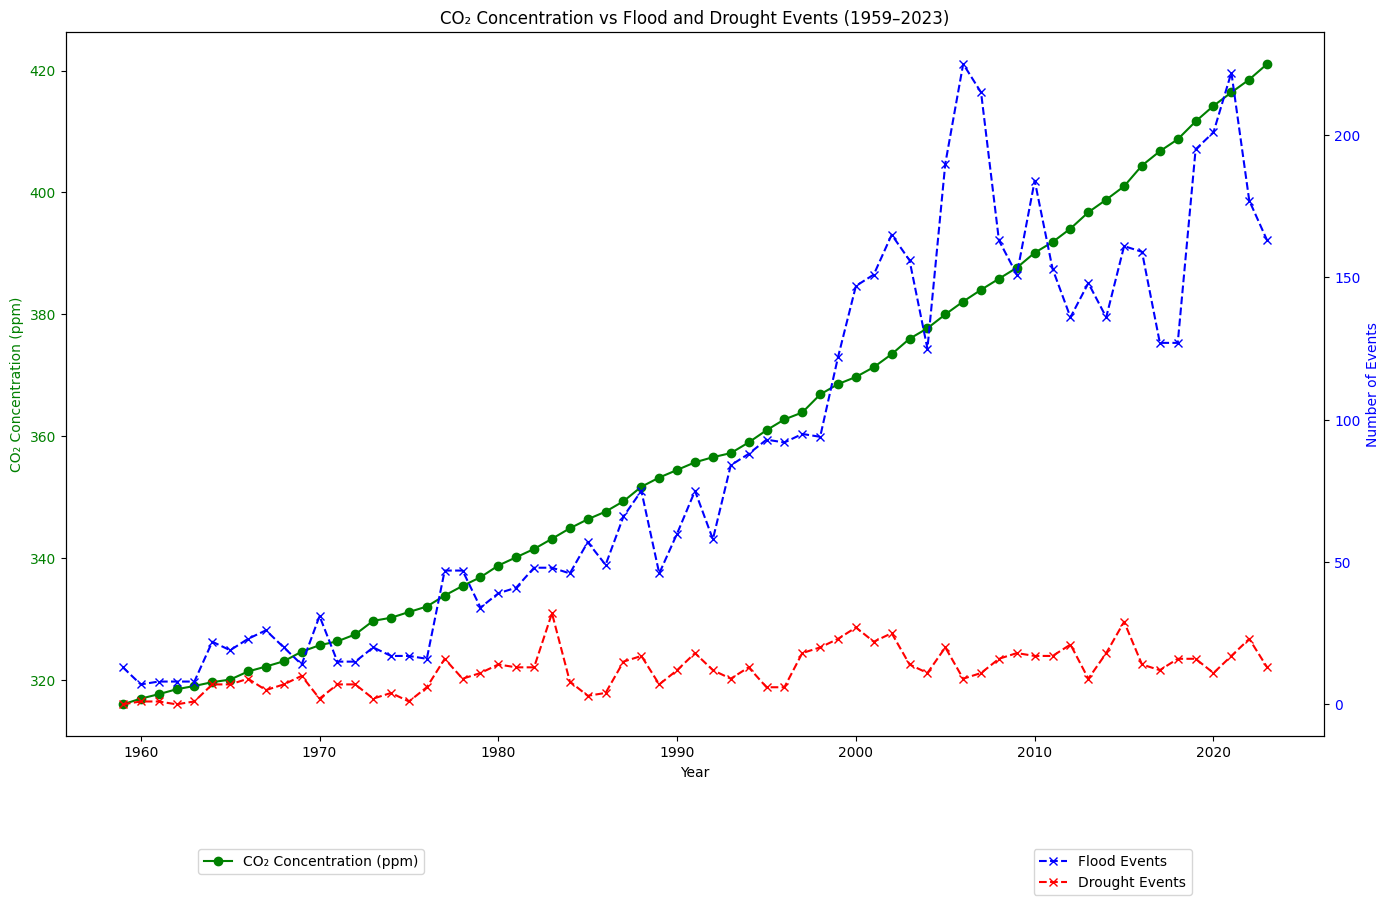

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# URLs for the datasets
co2_url = "https://raw.githubusercontent.com/RabinMahatara/INFOSCI301_Final_Project/main/Data/co2_annmean_mlo.csv"
emdat_url = "https://raw.githubusercontent.com/RabinMahatara/INFOSCI301_Final_Project/main/Data/public_emdat_custom_request_2024-12-05_48706c3d-dd4a-455f-aab7-c27e9aa15fa7.xlsx"

# Load CO2 data
co2_data = pd.read_csv(co2_url, comment='#')  # Skip commented header lines

# Filter CO2 data for years 1959–2023
co2_filtered = co2_data[(co2_data['year'] >= 1959) & (co2_data['year'] <= 2023)]
co2_filtered = co2_filtered.rename(columns={'year': 'Year', 'mean': 'CO2_ppm'})[['Year', 'CO2_ppm']]

# Load EM-DAT disaster data
emdat_data = pd.read_excel(emdat_url)

# Filter EM-DAT data for floods and droughts from 1959–2023
emdat_filtered = emdat_data[
    (emdat_data['Disaster Type'].isin(['Flood', 'Drought'])) &
    (emdat_data['Start Year'] >= 1959) & (emdat_data['Start Year'] <= 2023)
]

# Group by year and disaster type to count events
emdat_grouped = emdat_filtered.groupby(['Start Year', 'Disaster Type']).size().reset_index(name='Event Count')

# Pivot the data to create separate columns for Flood Events and Drought Events
emdat_pivot = emdat_grouped.pivot(index='Start Year', columns='Disaster Type', values='Event Count').fillna(0)
emdat_pivot.columns = ['Drought Events', 'Flood Events']
emdat_pivot.reset_index(inplace=True)
emdat_pivot.rename(columns={'Start Year': 'Year'}, inplace=True)

# Merge CO2 data with EM-DAT disaster event data on the Year column
merged_data = pd.merge(co2_filtered[['Year', 'CO2_ppm']], emdat_pivot[['Year', 'Flood Events', 'Drought Events']], on='Year', how='inner')

# Plotting the time-series plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot CO2 concentration on primary y-axis
ax1.plot(merged_data['Year'], merged_data['CO2_ppm'], color='green', marker='o', label='CO₂ Concentration (ppm)')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO₂ Concentration (ppm)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create secondary y-axis for flood and drought events
ax2 = ax1.twinx()
ax2.plot(merged_data['Year'], merged_data['Flood Events'], color='blue', marker='x', linestyle='--', label='Flood Events')
ax2.plot(merged_data['Year'], merged_data['Drought Events'], color='red', marker='x', linestyle='--', label='Drought Events')
ax2.set_ylabel('Number of Events', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and show plot
plt.title('CO₂ Concentration vs Flood and Drought Events (1959–2023)')
fig.tight_layout()

# Add legends for both axes
ax1.legend(loc="upper left", bbox_to_anchor=(0.1, -0.15))  # Adjusted position of CO₂ legend
ax2.legend(loc="upper right", bbox_to_anchor=(0.9, -0.15))  # Adjusted position of flood/drought legend

plt.show()

In [2]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the EM-DAT disaster data from GitHub
emdat_url = "https://raw.githubusercontent.com/RabinMahatara/INFOSCI301_Final_Project/main/Data/public_emdat_custom_request_2024-12-05_48706c3d-dd4a-455f-aab7-c27e9aa15fa7.xlsx"
emdat_data = pd.read_excel(emdat_url)

# Filter for Droughts
drought_data = emdat_data[emdat_data['Disaster Type'] == 'Drought']

# Group by ISO country codes and count drought events
drought_regional_data = drought_data.groupby('ISO').size().reset_index(name='Event Count')

# Create a choropleth map for Droughts
fig_drought = px.choropleth(
    drought_regional_data,
    locations="ISO",  # Use the 'ISO' column for country codes
    color="Event Count",
    color_continuous_scale="Blues",
    title="Regional Distribution of Droughts",
    locationmode="ISO-3"  # Ensure ISO-3 codes are used
)

# Show the drought map
fig_drought.show()

# Filter for Floods
flood_data = emdat_data[emdat_data['Disaster Type'] == 'Flood']

# Group by ISO country codes and count flood events
flood_regional_data = flood_data.groupby('ISO').size().reset_index(name='Event Count')

# Create a choropleth map for Floods
fig_flood = px.choropleth(
    flood_regional_data,
    locations="ISO",  # Use the 'ISO' column for country codes
    color="Event Count",
    color_continuous_scale="Reds",
    title="Regional Distribution of Floods",
    locationmode="ISO-3"  # Ensure ISO-3 codes are used
)

# Show the flood map
fig_flood.show()
